In [1]:
import cv2
import numpy as np
import pygame
#import cv2.cv as cv
import time
#import smtplib
from matplotlib import pyplot as plt
import requests

im = cv2.imread('Pothole.jpg')
# CODE TO CONVERT TO GRAYSCALE


gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# save the image
cv2.imwrite('graypothholeresultnew.jpg', gray1)
#CONTOUR DETECTION CODE
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)

#contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contours1, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours2, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


##print("cont1==",contours1) 
##print("cont2==",contours2)

#img1 = im.copy()
img2 = im.copy()

#out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
#out = np.hstack([img1, img2])
cv2.imshow('img1',img2)
cv2.waitKey(5000)
plt.subplot(331),plt.imshow(im),plt.title('GRAY')
plt.xticks([]), plt.yticks([])


img = cv2.imread('index2.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2) 
cnt = contours[0]
M = cv2.moments(cnt)

print(M)
perimeter = cv2.arcLength(cnt,True)
print(perimeter)
area = cv2.contourArea(cnt)
print(area)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print(epsilon)
print(approx)
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    #print cv2.contourArea(c)
    x,y,w,h = rect
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
    cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
#cv2.imshow("Show",img)
cv2.waitKey(3000)  
cv2.destroyAllWindows()
k = cv2.isContourConvex(cnt)

#to check convexity
print(k)
#blur
blur = cv2.blur(im,(5,5))
#guassian blur 
gblur = cv2.GaussianBlur(im,(5,5),0)
#median 
median = cv2.medianBlur(im,5)
#erosion
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(median,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 5)
#erosion followed dilation
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
#canny edge detection
edges = cv2.Canny(dilation,9,220)  
#plotting using matplotlib
plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
plt.xticks([]), plt.yticks([])        
plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
plt.xticks([]), plt.yticks([]) 
plt.subplot(337),plt.imshow(img,cmap = 'gray')
plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()
#alerting the driver
pygame.init()
pygame.mixer.music.load("buzz.mp3")
pygame.mixer.music.play()
time.sleep(5)

#geolocation
ip = '157.37.187.247'
url = 'http://api.ipstack.com/'+ip+"?access_key=f8a10d818a97380bff4081cf06720820"
r = requests.get(url)
js = r.json()

js['country_code']
js['country_name']
#js['time_zone']
js['city']
js.items()





#content ="detection of pothole in locality basapura road hosur road junction "
#mail = smtplib.SMTP('smtp.gmail.com',587)
#mail.ehlo()
#mail.starttls()
#mail.login('harika3196@gmail.com','hariammu3196@gmail.com')
#mail.sendmail('fromemail','receiver',content)
#mail.close()



pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


ConnectionError: HTTPConnectionPool(host='api.ipstack.com', port=80): Max retries exceeded with url: /157.37.187.247?access_key=f8a10d818a97380bff4081cf06720820 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000013DB30DF240>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


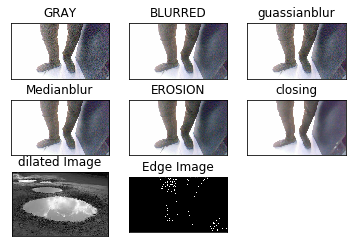

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


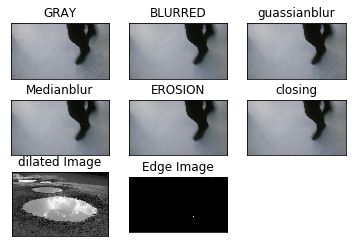

KeyboardInterrupt: 

In [4]:
import cv2
import numpy as np
import pygame
#import cv2.cv as cv
import time
#import smtplib
from matplotlib import pyplot as plt
##import scipy.misc
from PIL import Image
import requests

url1 ="http://192.168.43.1:8080/shot.jpg"

while True: #for video streaming
    geturl=requests.get(url1) #connect to the url
    photoweb=geturl.content #load content
    type(photoweb) # show datatype
    photobyte=bytearray(photoweb) #photo binary(bytes) into binary array
    imageId=np.array(photobyte) #bytearray converted into id numpy array
    frame = cv2.imdecode(imageId,-1)  #convert to 3d: cv2 support,  # -1 is a flag here

    reframe=cv2.resize(frame,(400,400))
    cv2.imshow("hi",reframe)
    ##scipy.misc.toimage(imageId, cmin=0.0, cmax=...).save('outfile.jpg')
    
    ##imgg = Image.fromarray(imageId)
    ##imgg.save("outfile.jpg")
    
    #cv2.imwrite("outfile.jpg", imageId)
    cv2.imwrite("outfile.jpg", frame)
    
    im = cv2.imread('outfile.jpg')
    # CODE TO CONVERT TO GRAYSCALE


    gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # save the image
    cv2.imwrite('graypothholeresultnew.jpg', gray1)
    #CONTOUR DETECTION CODE
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)

    #contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    contours1, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contours2, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


    #print("cont1==",contours1) 
    #print("cont2==",contours2)

    #img1 = im.copy()
    img2 = im.copy()

    #out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
    out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
    #out = np.hstack([img1, img2])
    cv2.imshow('img1',img2)
    cv2.waitKey(5000)
    plt.subplot(331),plt.imshow(im),plt.title('GRAY')
    plt.xticks([]), plt.yticks([])


    img = cv2.imread('index2.jpg',0)
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2) 
    cnt = contours[0]
    M = cv2.moments(cnt)

    print(M)
    perimeter = cv2.arcLength(cnt,True)
    print(perimeter)
    area = cv2.contourArea(cnt)
    print(area)
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    print(epsilon)
    print(approx)
    for c in contours:
        rect = cv2.boundingRect(c)
        if rect[2] < 100 or rect[3] < 100: continue
        #print cv2.contourArea(c)
        x,y,w,h = rect
        cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
        cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
    #cv2.imshow("Show",img)
    cv2.waitKey(3000)  
    cv2.destroyAllWindows()
    k = cv2.isContourConvex(cnt)

    #to check convexity
    print(k)
    #blur
    blur = cv2.blur(im,(5,5))
    #guassian blur 
    gblur = cv2.GaussianBlur(im,(5,5),0)
    #median 
    median = cv2.medianBlur(im,5)
    #erosion
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(median,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 5)
    #erosion followed dilation
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    #canny edge detection
    edges = cv2.Canny(dilation,9,220)  
    #plotting using matplotlib
    plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
    plt.xticks([]), plt.yticks([])
    plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
    plt.xticks([]), plt.yticks([])        
    plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
    plt.xticks([]), plt.yticks([]) 
    plt.subplot(337),plt.imshow(img,cmap = 'gray')
    plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(338),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
    plt.xticks([]), plt.yticks([])
    plt.subplot(336),plt.imshow(closing),plt.title('closing')
    plt.xticks([]), plt.yticks([])
    plt.show()
    #alerting the driver
    pygame.init()
    pygame.mixer.music.load("buzz.mp3")
    pygame.mixer.music.play()
    time.sleep(5)
    
    #geolocation
    ip = '157.37.187.247'
    url = 'http://api.ipstack.com/'+ip+"?access_key=f8a10d818a97380bff4081cf06720820"
    r = requests.get(url)
    js = r.json()

    js['country_code']
    js['country_name']
    #js['time_zone']
    js['city']
    js.items()

    #content ="detection of pothole in locality basapura road hosur road junction "
    #mail = smtplib.SMTP('smtp.gmail.com',587)
    #mail.ehlo()
    #mail.starttls()
    #mail.login('harika3196@gmail.com','hariammu3196@gmail.com')
    #mail.sendmail('fromemail','receiver',content)
    #mail.close()

    if cv2.waitKey(1) == 13: # 13 = ascii value of enter
        break
cv2.destroyAllWindows()